<a href="https://colab.research.google.com/github/Kritikagupt/Ai-project/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder


In [54]:
df = sns.load_dataset('iris')

In [55]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
le= LabelEncoder()
y_encoded= le.fit_transform(y)

In [57]:
x = df.drop('species', axis= 1)
y= df['species']


In [58]:
x_test,x_train,y_test,y_train= train_test_split(
    x,y_encoded,test_size=0.2,random_state=42,stratify=y_encoded
)

In [59]:
base_models = [
    ('dt',DecisionTreeClassifier(random_state=42)),
    ('svm',SVC(probability=True,random_state=42)),
    ('lr',LogisticRegression(random_state=42))
]


In [60]:
meta_learner = LogisticRegression(max_iter=1000)

In [61]:
s_clf=StackingClassifier(
    estimators=base_models,final_estimator=meta_learner,cv=5
)

In [62]:
s_clf.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42)),
                               ('lr', LogisticRegression(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [63]:
y_pred=s_clf.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred)

0.9583333333333334

In [65]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        40\n           1       0.95      0.93      0.94        40\n           2       0.93      0.95      0.94        40\n\n    accuracy                           0.96       120\n   macro avg       0.96      0.96      0.96       120\nweighted avg       0.96      0.96      0.96       120\n'

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,

)


In [69]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred= rf_model.predict(x_test)

In [72]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9583333333333334

In [73]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [74]:
from xgboost import XGBClassifier

In [75]:
ada_model = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)


In [76]:
ada_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [77]:
ada_pred = ada_model.predict(x_test)

In [78]:
accuracy_score(y_test,ada_pred)

0.9666666666666667

In [79]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
)

In [80]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
gb_pred = gb_model.predict(x_test)

In [82]:
accuracy_score(y_test,gb_pred)

0.9666666666666667

In [87]:
xg_model= XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [88]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [89]:
xg_pred= xg_model.predict(x_test)

In [90]:
accuracy_score(y_test,xg_pred)

0.9666666666666667

In [91]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [92]:
x, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6 , random_state=42)

In [93]:
df = pd.DataFrame(x, columns=['feature1', 'feature2'])

In [94]:
df

,feature1,feature2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [95]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [101]:
inertia =[]
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

In [102]:
inertia

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

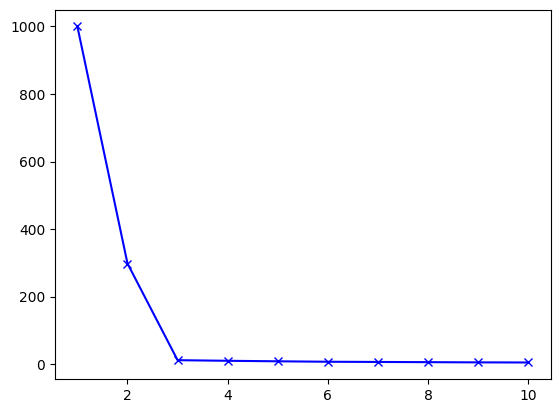

In [103]:
plt.plot(K_range,inertia,'bx-')

In [111]:
Kmeans_final = KMeans(n_clusters=3,random_state=42)

In [106]:
cluster_labels = Kmeans_final.fit_predict(x_scaled)
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [107]:
df['cluster'] = cluster_labels

<Axes: xlabel='feature1', ylabel='feature2'>

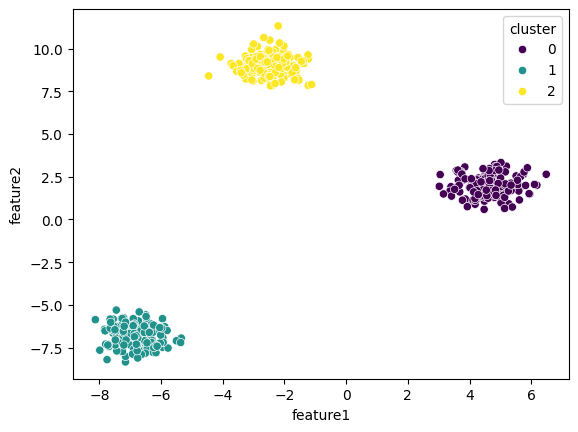

In [112]:
sns.scatterplot(x='feature1',
                y='feature2',
                hue='cluster',
                data=df,
                palette='viridis')

In [113]:
from sklearn.datasets import make_moons

In [114]:
x,y = make_moons(noise=0.05 , n_samples=500 , random_state=42)


In [115]:
from sklearn.cluster import KMeans, DBSCAN

In [116]:
df = pd.DataFrame(x,columns=['feature1','feature2'])

In [117]:
df

,feature1,feature2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [118]:
scaler  = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [119]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)

In [120]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='feature1', ylabel='feature2'>

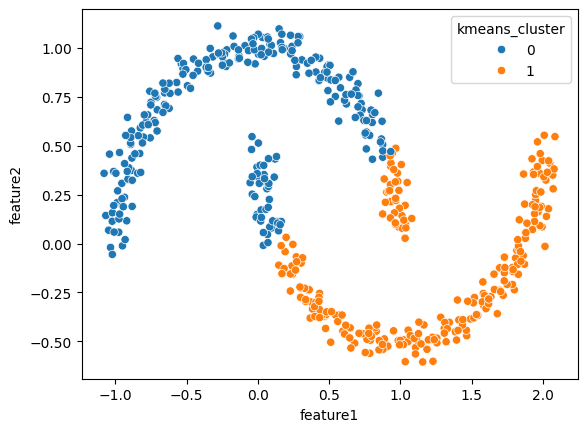

In [122]:
sns.scatterplot(x='feature1',
                y='feature2',
                hue='kmeans_cluster',
                data=df,
                palette='tab10')

In [125]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scaled)

In [126]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='feature1', ylabel='feature2'>

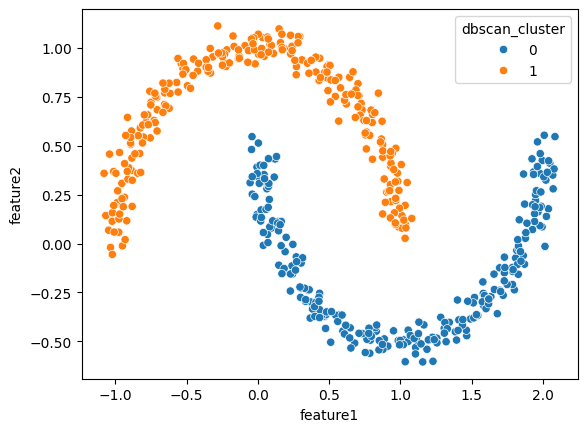

In [127]:
sns.scatterplot(x='feature1',
                y='feature2',
                hue='dbscan_cluster',
                data=df,
                palette='tab10')